# Comparing the distances from supernova distribution

Here I compare the distributions of distances of the sequences core positions from supernova core in two datasets. The first dataset being the 6th round of Katka's selection and the second being Martins initial MUP selection.

In [1]:
import pandas as pd
from ivstools import tools
import matplotlib.pyplot as plt

In [2]:
############ Matplotlib settings ############
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Arial'

In [3]:
# Read the datasets

df_mv = pd.read_csv('/home/kurfurst/Documents/datasets/MV_MUP_full_FAcounts.tsv', sep='\t', names=['count', 'seq'])
df_ks = pd.read_csv('/home/kurfurst/Documents/datasets/KS_CDP_round6.tsv', sep='\t', names=['count', 'seq'])

In [4]:
# Define the reference sequences

sn_full = tools.supernova_full
sn_core = tools.supernova_core
core_pos = tools.supernova_core_positions
core_pos_0based = [x - 1 for x in core_pos]

In [5]:
# Extract cores

df_mv['core'] = [''.join([s[x] for x in core_pos_0based]) for s in df_mv['seq']]
df_ks['core'] = [''.join([s[x] for x in core_pos_0based]) for s in df_ks['seq']]

In [6]:
# Compute distances of core and full variants from sn core or full respectively

df_mv['fullDist'] = [tools.seqDist(sn_full, s) for s in df_mv['seq']]
df_ks['fullDist'] = [tools.seqDist(sn_full, s) for s in df_ks['seq']]

df_mv['coreDist'] = [tools.seqDist(sn_core, s) for s in df_mv['core']]
df_ks['coreDist'] = [tools.seqDist(sn_core, s) for s in df_ks['core']]

In [7]:
mean_mv_full = round(df_mv['fullDist'].mean(), 2)
mean_ks_full = round(df_ks['fullDist'].mean(), 2)

---
Here is what the comparison of the distributions looks like when we use full-length sequecnes..

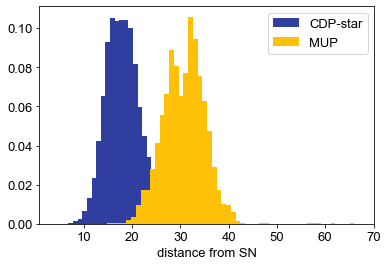

In [9]:
plt.hist(df_ks['fullDist'], bins=max(df_ks['fullDist'])-1, label='CDP-star', color='#303f9f', density=True)
plt.hist(df_mv['fullDist'], bins=max(df_mv['fullDist'])-8, label='MUP', color='#ffc107', density=True)
#plt.text(15, 0.03, mean_ks_full)
#plt.text(28, 0.03, mean_mv_full, color='white')
plt.xlabel('distance from SN')
plt.legend()
#plt.show()
plt.savefig('fig2c_v2.png', dpi=180)

In [10]:
print("The mean of the CDP-star peak: ", mean_ks_full)
print("The mean of the MUP peak: ", mean_mv_full)

The mean of the CDP-star peak:  18.42
The mean of the MUP peak:  30.68


---
And here it is if we were to use the core positions only

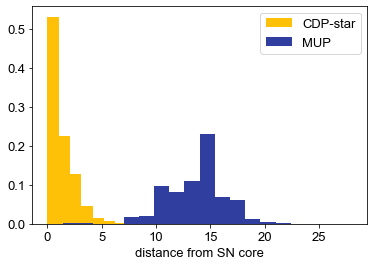

In [11]:
plt.hist(df_ks['coreDist'], bins=max(df_ks['coreDist'])-1, label='CDP-star', color='#ffc107', density=True)
plt.hist(df_mv['coreDist'], bins=max(df_mv['coreDist'])-8, label='MUP', color='#303f9f', density=True)
plt.xlabel('distance from SN core')
plt.legend()
plt.show()

---
Here is the original figure, mean values for each of the peaks separately.

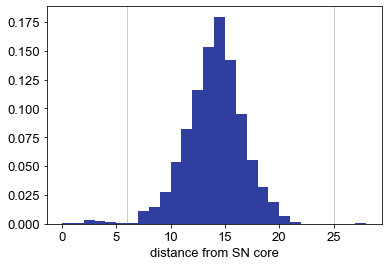

In [12]:
plt.hist(df_mv['coreDist'], bins=max(df_mv['coreDist']), color='#303f9f', density=True)
plt.axvline(6, linewidth=1, alpha=0.4, color='grey')
plt.axvline(25, linewidth=1, alpha=0.4, color='grey')
plt.xlabel('distance from SN core')
plt.show()

The mean value for the peak on the left is:

In [13]:
print(df_mv[df_mv['coreDist'] <= 6]['coreDist'].mean())

2.986013986013986


for the peak on the right it is:

In [14]:
print(df_mv[df_mv['coreDist'] > 6]['coreDist'].mean())

13.622783488024307


The mean of the distribution in the KS_rnd6 dataset is 

In [15]:
print(df_ks['coreDist'].mean())

1.6164691918881864
